<a href="https://colab.research.google.com/github/immischein/ML-bandgap/blob/immanuel_code/Test_toy_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# You might need to reinstall the library manually, imports ans pip install:
!pip install mp_api
!pip install pymatgen

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.4/99.4 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 217.1/217.1 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.6/122.6 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 116.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.4/561.4 kB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
# Import
# from mp_api.client import MPRester
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import json
from pymatgen.core.structure import Structure
import matplotlib.pyplot as plt
import seaborn as sns
from pymatgen.core.composition import Composition
from pymatgen.core.periodic_table import Element
import time

In [5]:
# Load the JSON data
with open("/content/drive/MyDrive/Project Documents ML-CMT/materials_data.json") as f:
    materials_data = json.load(f)

In [6]:
start = time.time()

# Build tabular dataset
records = []
for m in materials_data:
    struct = Structure.from_dict(m["structure"])
    elements = struct.species

    # electronegativity
    en_values = [Element(el).X for el in elements]

    #ie
    ie_values = [Element(el).ionization_energy for el in elements]

    #am
    am_values = [Element(el).atomic_mass for el in elements]

    #vdw
    vdw_values = [Element(el).van_der_waals_radius for el in elements]

    record = {
        "material_id": m["material_id"],
        "band_gap": m["band_gap"],
        "density": m["density"],

        "max_en": np.min(en_values),
        "min_en": np.max(en_values),

        "avg_ie": np.mean(ie_values),
        "max_ie": np.max(ie_values),
        "min_ie": np.min(ie_values),

        "max_am": np.max(am_values),
        "min_am": np.min(am_values),

        "max_vdw": np.max(vdw_values),
        "min_vdw": np.min(vdw_values),

        "vbm": m["vbm"],
        "cbm": m["cbm"],

        "mean_distance": 0.0 if m["nsites"] == 1 else np.mean(struct.distance_matrix[0][1:]),
        "max_distance": np.max(struct.distance_matrix[0]),
        "min_distance": np.min(struct.distance_matrix[0]) if m["nsites"] == 1 else np.sort(struct.distance_matrix[0])[1], # taking second smallest distance, because distance to self is always 0
        "std_distance": 0.0 if m["nsites"] == 1 else np.std(struct.distance_matrix[0][1:]),
        "spacegroup_number " : struct.get_space_group_info()[1],

    }
    records.append(record)

end = time.time()

print(f"Execution time: {end - start:.4f} seconds")

# df = pd.DataFrame(records)
# df.to_csv("bandgap_dataset.csv", index=False)

# print(f"Saved tabular dataset to bandgap_dataset.csv with shape {df.shape}")

<ipython-input-6-24c5ab8ce5ce>:10: UserWarning: No Pauling electronegativity for Ar. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  en_values = [Element(el).X for el in elements]
<ipython-input-6-24c5ab8ce5ce>:10: UserWarning: No Pauling electronegativity for He. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  en_values = [Element(el).X for el in elements]
<ipython-input-6-24c5ab8ce5ce>:10: UserWarning: No Pauling electronegativity for Ne. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  en_values = [Element(el).X for el in elements]


Execution time: 683.9918 seconds


In [7]:
df = pd.DataFrame(records)

In [8]:
# 1. Identify columns with missing values
missing = df.isnull().sum()
cols_to_pop = missing[missing > 0].index.tolist()

# 2. Pop and store them in a separate dictionary
popped_columns = {col: df.pop(col) for col in cols_to_pop}

In [9]:
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing, 'Percent': missing_percent})
print(missing_df[missing_df['Missing Values'] > 0])

Empty DataFrame
Columns: [Missing Values, Percent]
Index: []


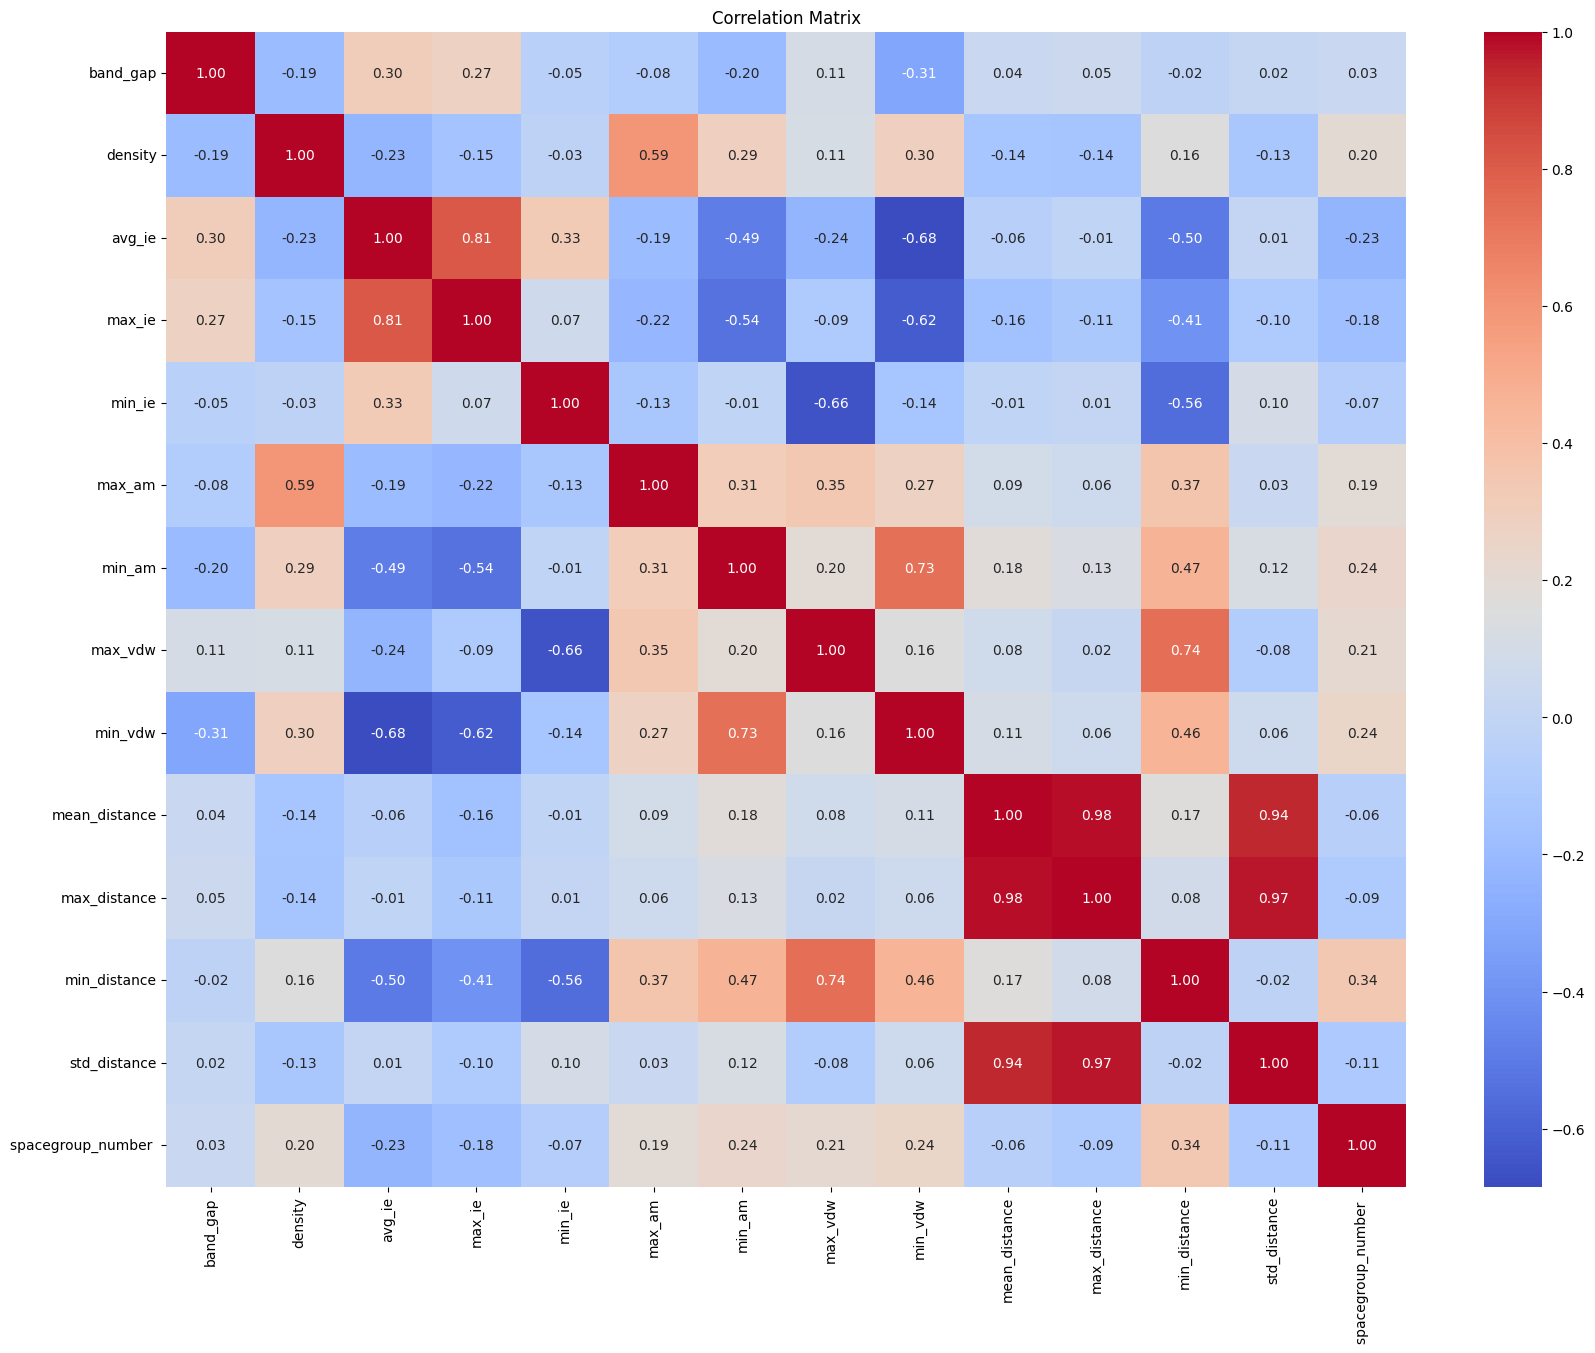

82998

In [10]:

plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()
len(df)

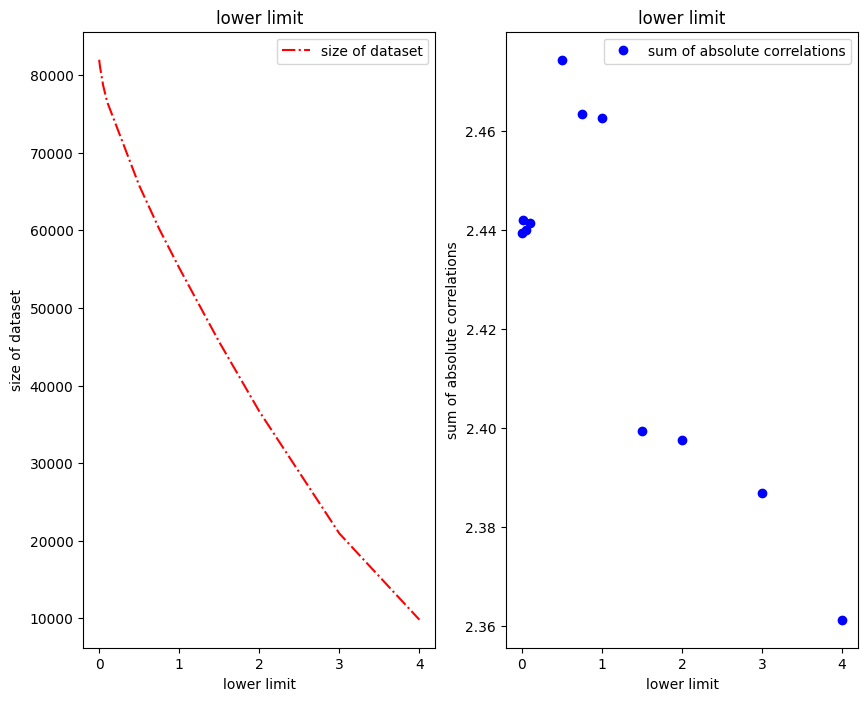

[81998, 81136, 78668, 76562, 65786, 60186, 55163, 45607, 36674, 20933, 9816]
[np.float64(2.439240836391747), np.float64(2.4419098200086933), np.float64(2.4399169126969715), np.float64(2.441369680775045), np.float64(2.47432940876806), np.float64(2.4633377487712367), np.float64(2.46246966169801), np.float64(2.3992938537448842), np.float64(2.397506065512389), np.float64(2.386858624987818), np.float64(2.3611924405566485)]


In [11]:
sum_correlations = []
size_dataset = []
lowerlimits = [0,0.01,0.05, 0.1, 0.5, 0.75, 1, 1.5, 2, 3, 4]
for limit in lowerlimits:
  dflimit = df.copy()[df["band_gap"] > limit]
  sum_correlations.append(np.sum(np.abs(np.array(dflimit.corr(numeric_only=True))[0])))
  size_dataset.append(len(dflimit))
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(lowerlimits, size_dataset, '-.r')
plt.xlabel("lower limit")
plt.ylabel("size of dataset")
plt.title("lower limit")
plt.legend(["size of dataset"])
plt.subplot(1, 2, 2)
plt.plot(lowerlimits, sum_correlations, 'ob')
plt.xlabel("lower limit")
plt.ylabel("sum of absolute correlations")
plt.title("lower limit")
plt.legend(["sum of absolute correlations"])
plt.show()

print(size_dataset)
print(sum_correlations)

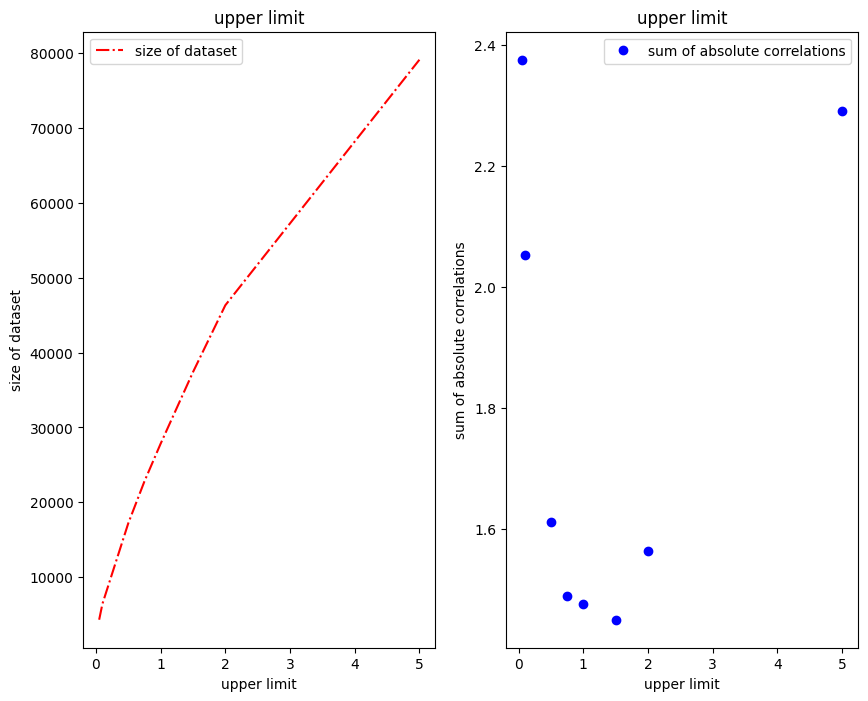

[4330, 6433, 17210, 22812, 27834, 37390, 46320, 79105]
[np.float64(2.374918727895899), np.float64(2.0523561477234016), np.float64(1.6118413682862314), np.float64(1.4885289198130853), np.float64(1.4763020793428532), np.float64(1.4496587623257524), np.float64(1.5638654119755921), np.float64(2.289980078361389)]


In [12]:
sum_correlations = []
size_dataset = []
upperlimit = [0.05, 0.1, 0.5, 0.75, 1, 1.5, 2, 5]
for limit in upperlimit:
  dflimit = df.copy()[df["band_gap"] < limit]
  sum_correlations.append(np.sum(np.abs(np.array(dflimit.corr(numeric_only=True))[0])))
  size_dataset.append(len(dflimit))
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(upperlimit, size_dataset, '-.r')
plt.xlabel("upper limit")
plt.ylabel("size of dataset")
plt.title("upper limit")
plt.legend(["size of dataset"])
plt.subplot(1, 2, 2)
plt.plot(upperlimit, sum_correlations, 'ob')
plt.xlabel("upper limit")
plt.ylabel("sum of absolute correlations")
plt.title("upper limit")
plt.legend(["sum of absolute correlations"])
plt.show()

print(size_dataset)
print(sum_correlations)


In [11]:
# Remove a single column (returns a new DataFrame unless inplace=True)
df = df.drop('material_id', axis=1)

In [12]:
df

,band_gap,density,avg_ie,max_ie,min_ie,max_am,min_am,max_vdw,min_vdw,mean_distance,max_distance,min_distance,std_distance,spacegroup_number
0,3.5226,9.109130,10.322923,13.618055,5.380226,227.0000,15.999400,2.47,1.52,2.923952,3.890396,2.464169,0.574683,164
1,2.2962,6.535149,8.368096,10.360010,5.380226,227.0000,32.065000,2.47,1.80,5.246288,7.860660,2.984502,1.504920,122
2,3.0275,5.562971,8.368096,10.360010,5.380226,227.0000,32.065000,2.47,1.80,3.573641,5.479204,2.966849,0.869958,167
3,0.0794,7.997421,7.744019,9.009808,5.380226,227.0000,107.868200,2.47,2.06,3.589974,3.942065,3.413928,0.248966,225
4,4.1024,8.728230,10.444032,13.618055,5.380226,227.0000,15.999400,2.47,1.52,2.881768,3.341675,2.728466,0.265527,221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82993,0.0000,6.819246,6.781002,7.576234,5.985769,107.8682,26.981539,2.11,1.84,2.784869,2.784869,2.784869,0.000000,187
82994,0.0000,8.170902,7.046079,7.576234,5.985769,107.8682,26.981539,2.11,1.84,2.808783,2.886590,2.771579,0.042019,63
82995,0.0000,8.320607,7.178618,7.576234,5.985769,107.8682,26.981539,2.11,1.84,3.300163,4.491163,2.704663,0.842164,65
82996,0.0000,8.683934,7.178618,7.576234,5.985769,107.8682,26.981539,2.11,1.84,3.488931,4.880175,2.586837,0.875062,146


In [13]:
# Separate target and features
target = df.iloc[:, 0]
features = df.iloc[:, 1:]

# Normalize features: (X - mean) / std
feature_mean = features.mean()
feature_std = features.std()
features_normalized = (features - feature_mean) / feature_std

# Optional: Normalize target (if needed)
target = (target - target.mean()) / target.std()

# Recombine if needed
df_normalized = pd.concat([target, features_normalized], axis=1)

In [14]:
import torch
from sklearn.model_selection import train_test_split

# Assume `df` is your DataFrame
# 1. Split target and features
y = torch.tensor(df_normalized.iloc[:, 0].values, dtype=torch.float32)         # target
X = torch.tensor(df_normalized.iloc[:, 1:].values, dtype=torch.float32)        # features

# 2. Split into train, val, and test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% train
X_val, X_test, y_val, y_test     = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 15% val, 15% test

# 3. Wrap in TensorDatasets (optional, for DataLoader usage)
from torch.utils.data import TensorDataset

train_dataset = TensorDataset(X_train, y_train)
val_dataset   = TensorDataset(X_val, y_val)
test_dataset  = TensorDataset(X_test, y_test)

In [15]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=32)
test_loader  = DataLoader(test_dataset, batch_size=32)

In [16]:
import torch.nn as nn

class DeepRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.2),

            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.2),

            nn.Linear(128, 64),
            nn.ReLU(),

            nn.Linear(64, 32),
            nn.ReLU(),

            nn.Linear(32, 16),
            nn.ReLU(),

            nn.Linear(16, 1)
        )

    def forward(self, x):
        return self.model(x)

In [17]:
model = DeepRegressionModel(input_dim=X.shape[1])  # Set input dim to number of features
loss_fn = nn.L1Loss()  # mean absolute error — more robust
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [18]:
import matplotlib.pyplot as plt

train_losses = []
val_losses = []

num_epochs = 50  # or however many you're running

for epoch in range(num_epochs):
    model.train()
    total_train_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch).squeeze()
        loss = loss_fn(outputs, y_batch)
        loss.backward()
        optimizer.step()
        total_train_loss += loss.item()

    # Validation
    model.eval()
    total_val_loss = 0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            outputs = model(X_batch).squeeze()
            val_loss = loss_fn(outputs, y_batch)
            total_val_loss += val_loss.item()

    # Save losses
    train_losses.append(total_train_loss)
    val_losses.append(total_val_loss)

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {total_train_loss:.4f}, Val Loss: {total_val_loss:.4f}")

Epoch 1/50, Train Loss: 1255.2201, Val Loss: 256.9717
Epoch 2/50, Train Loss: 1212.7174, Val Loss: 246.1092
Epoch 3/50, Train Loss: 1187.1921, Val Loss: 243.3149
Epoch 4/50, Train Loss: 1173.7536, Val Loss: 239.0155
Epoch 5/50, Train Loss: 1161.4206, Val Loss: 238.2875
Epoch 6/50, Train Loss: 1154.4188, Val Loss: 239.0874
Epoch 7/50, Train Loss: 1147.7420, Val Loss: 236.2208
Epoch 8/50, Train Loss: 1139.8504, Val Loss: 234.5821
Epoch 9/50, Train Loss: 1133.6990, Val Loss: 233.6831
Epoch 10/50, Train Loss: 1129.6895, Val Loss: 231.5176
Epoch 11/50, Train Loss: 1127.2737, Val Loss: 229.5931
Epoch 12/50, Train Loss: 1124.1796, Val Loss: 228.0042
Epoch 13/50, Train Loss: 1119.6264, Val Loss: 229.7009
Epoch 14/50, Train Loss: 1112.0187, Val Loss: 226.8921
Epoch 15/50, Train Loss: 1112.9087, Val Loss: 227.2065
Epoch 16/50, Train Loss: 1105.8369, Val Loss: 227.2940
Epoch 17/50, Train Loss: 1103.9701, Val Loss: 226.6744
Epoch 18/50, Train Loss: 1102.8167, Val Loss: 225.3349
Epoch 19/50, Train 

In [19]:
model.eval()
val_loss = 0
with torch.no_grad():
    for X_batch, y_batch in val_loader:
        outputs = model(X_batch).squeeze()
        loss = loss_fn(outputs, y_batch)
        val_loss += loss.item()

print(f"Validation Loss: {val_loss:.4f}")

Validation Loss: 216.8581


Test Loss: 217.9533


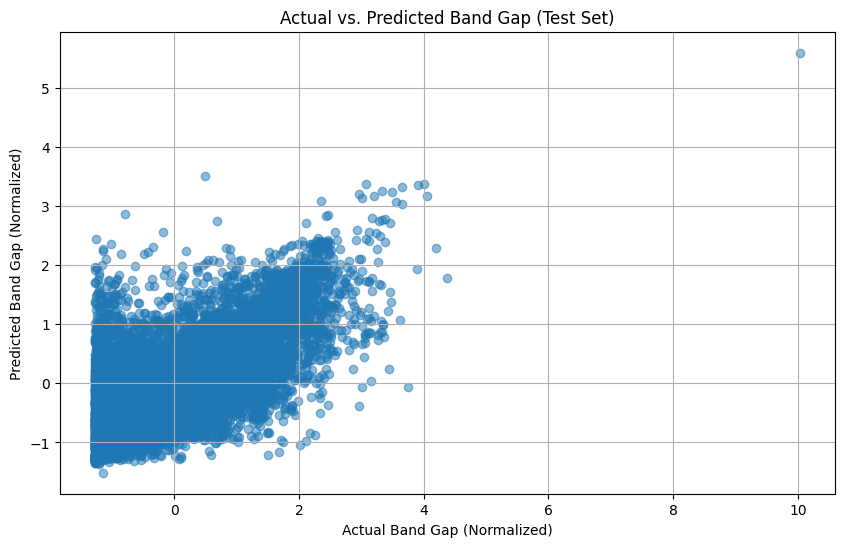

R-squared on Test Set: 0.4280


In [20]:
# prompt: write some code to test the model now using the test set and compare with targets

import matplotlib.pyplot as plt
model.eval()
test_loss = 0
predictions = []
targets = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch).squeeze()
        loss = loss_fn(outputs, y_batch)
        test_loss += loss.item()
        predictions.extend(outputs.cpu().numpy())
        targets.extend(y_batch.cpu().numpy())

print(f"Test Loss: {test_loss:.4f}")

# You can further analyze predictions vs targets here
# For example, plot them
plt.figure(figsize=(10, 6))
plt.scatter(targets, predictions, alpha=0.5)
plt.xlabel("Actual Band Gap (Normalized)")
plt.ylabel("Predicted Band Gap (Normalized)")
plt.title("Actual vs. Predicted Band Gap (Test Set)")
plt.grid(True)
plt.show()

# Calculate R-squared
from sklearn.metrics import r2_score
r2 = r2_score(targets, predictions)
print(f"R-squared on Test Set: {r2:.4f}")